In [1]:
from sqlalchemy import create_engine, text
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd   
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CBS2022 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2022')

In [3]:
CBS2021 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2021')

In [4]:
CBS2020 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2020')

In [5]:
CBS2019 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2019')

In [6]:
CBS2018 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2018')

In [7]:
CBS2017 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2017')

In [8]:
CBS2016 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2016') #explore rows on down

In [9]:
CBS2015 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2015')

In [10]:
CBS2014 = pd.read_excel('..\data\CBS.xlsx', sheet_name = '2014')

In [11]:
CBS2013 = pd.read_csv("..\data\CBS2013.csv")

In [12]:
CBS2012 = pd.read_csv("..\data\CBS2012.csv")

In [13]:
CBS2011 = pd.read_csv("..\data\CBS2011.csv")

In [14]:
CBS2010 = pd.read_csv("..\data\CBS2010.csv")

In [15]:
CBS2009 = pd.read_csv("..\data\CBS2009.csv")

In [16]:
CBS2008 = pd.read_csv("..\data\CBS2008.csv")

In [17]:
CBS2007 = pd.read_csv("..\data\CBS2007.csv")

In [18]:
CBS2022.head()

,State,Year,buffer nop list,Number of programs,Total houseless pop.,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,AK,2022,AK 2,2.0,2320.0,3088,2547,2439,0.7898,2615,...,279,279,85,0.3047,23,106,173,0,0,0
1,AL,2022,AL 8,8.0,3752.0,2714,2229,1757,0.6474,2034,...,73,73,73,1.0000,6,20,53,0,9,0
2,AR,2022,AR 5,5.0,2459.0,2318,1787,1117,0.4819,1920,...,22,22,22,1.0000,5,12,10,0,0,0
3,AZ,2022,AZ 3,3.0,13553.0,6162,5467,5089,0.8259,4272,...,698,698,419,0.6003,148,482,216,0,23,3
4,CA,2022,CA 44,44.0,171521.0,68607,64427,52234,0.7614,52839,...,18377,18235,14878,0.8096,2102,6203,12167,7,526,487


In [103]:
CBS2022

,State,Year,buffer nop list,Number of programs,Total houseless pop.,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,AK,2022,AK 2,2.0,2320.0,3088,2547,2439,0.7898,2615,...,279,279,85,0.3047,23,106,173,0,0,0
1,AL,2022,AL 8,8.0,3752.0,2714,2229,1757,0.6474,2034,...,73,73,73,1.0000,6,20,53,0,9,0
2,AR,2022,AR 5,5.0,2459.0,2318,1787,1117,0.4819,1920,...,22,22,22,1.0000,5,12,10,0,0,0
3,AZ,2022,AZ 3,3.0,13553.0,6162,5467,5089,0.8259,4272,...,698,698,419,0.6003,148,482,216,0,23,3
4,CA,2022,CA 44,44.0,171521.0,68607,64427,52234,0.7614,52839,...,18377,18235,14878,0.8096,2102,6203,12167,7,526,487
5,CO,2022,CO 4,4.0,10397.0,9294,8759,5873,0.6319,6187,...,2823,2823,998,0.3535,926,1351,1470,2,60,31
6,CT,2022,CT 2,2.0,2930.0,2424,2025,1950,0.8045,1985,...,0,0,0,NaN,0,0,0,0,0,0
7,DC,2022,DC 1,1.0,4410.0,6598,6125,5829,0.8834,4795,...,6498,6447,5199,0.8001,1576,4757,1741,0,51,0
8,DE,2022,DE 1,1.0,2369.0,1426,1356,1034,0.7251,985,...,45,45,45,1.0000,4,4,41,0,8,8
9,FL,2022,FL 27,27.0,25959.0,18393,16020,14462,0.7863,12561,...,3654,3654,1984,0.5430,828,1813,1841,0,237,95


In [20]:
totalperp2022 = CBS2022[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2022['State']= '2022'
totalperp2022=totalperp2022.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [21]:
totalperp2021 = CBS2021[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2021['State']= '2021'
totalperp2021=totalperp2021.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [22]:
totalperp2020= CBS2020[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2020['State']= '2020'
totalperp2020=totalperp2020.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [23]:
totalperp2019 = CBS2019[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2019['State']= '2019'
totalperp2019=totalperp2019.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [24]:
totalperp2018 = CBS2018[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2018['State']= '2018'
totalperp2018=totalperp2018.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [25]:
totalperp2017 = CBS2017[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2017['State']= '2017'
totalperp2017=totalperp2017.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [26]:
totalperp2016 = CBS2016[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2016['State']= '2016'
totalperp2016=totalperp2016.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [27]:
totalperp2015 = CBS2015[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2015['State']= '2015'
totalperp2015=totalperp2015.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [28]:
totalperp2014 = CBS2014[['State','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].tail(1)
totalperp2014['State']= '2014'
totalperp2014=totalperp2014.rename(columns={'State':'Year','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)':'Participation Rate'})

In [29]:
CBS2013[['State','HMIS Participation Rate (ES,TH,RRH,SH)']].tail(1)
tp =CBS2013[['State','HMIS Participation Rate (ES,TH,RRH,SH)']].tail(1)

tp.iloc[0]=0.7003
tp['State']= '2013'
totalperp2013=tp
totalperp2013=totalperp2013.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,RRH,SH)':'Participation Rate'})

In [30]:
tp = CBS2012[['State','HMIS Participation Rate (ES,TH,SH)']].tail(1)

tp.iloc[0]=0.6980
tp['State']= '2012'
totalperp2012=tp
totalperp2012=totalperp2012.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,SH)':'Participation Rate'})

In [31]:
tp = CBS2011[['State','HMIS Participation Rate (ES,TH,SH)']].tail(1)

tp.iloc[0]=0.6797
tp['State']= '2011'
totalperp2011=tp
totalperp2011=totalperp2011.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,SH)':'Participation Rate'})

In [32]:
tp = CBS2010[['State','HMIS Participation Rate (ES,TH,SH)']].tail(1)

tp.iloc[0]=0.6779
tp['State']= '2010'
totalperp2010=tp
totalperp2010=totalperp2010.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,SH)':'Participation Rate'})

In [33]:
tp = CBS2009[['State','HMIS Participation Rate (ES,TH,SH)']].tail(1)

tp.iloc[0]=0.6599
tp['State']= '2009'
totalperp2009=tp
totalperp2009=totalperp2009.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,SH)':'Participation Rate'})

In [34]:
tp = CBS2008[['State','HMIS Participation Rate (ES,TH,SH)']].tail(1)

tp.iloc[0]=0.6271
tp['State']= '2008'
totalperp2008=tp
totalperp2008=totalperp2008.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH,SH)':'Participation Rate'})

In [35]:
tp = CBS2007[['State','HMIS Participation Rate (ES,TH)']].tail(1)

tp.iloc[0]=0.5979
tp['State']= '2007'
totalperp2007=tp
totalperp2007=totalperp2007.rename(columns={'State':'Year','HMIS Participation Rate (ES,TH)':'Participation Rate'})

In [36]:
totalperp2007

,Year,Participation Rate
54,2007,0.5979


In [37]:
all_perp_rates = pd.concat([totalperp2022,totalperp2021,totalperp2020,totalperp2019,totalperp2018,totalperp2017,totalperp2016,totalperp2015,totalperp2014,totalperp2013,totalperp2012,totalperp2011,totalperp2010,totalperp2009,totalperp2008,totalperp2007], axis=0)

<Axes: title={'center': 'Participation Rate for Emergency shelters, Transitional housing, & Safe-Havens 2007-2022'}, xlabel='Year', ylabel='Participation Rate'>

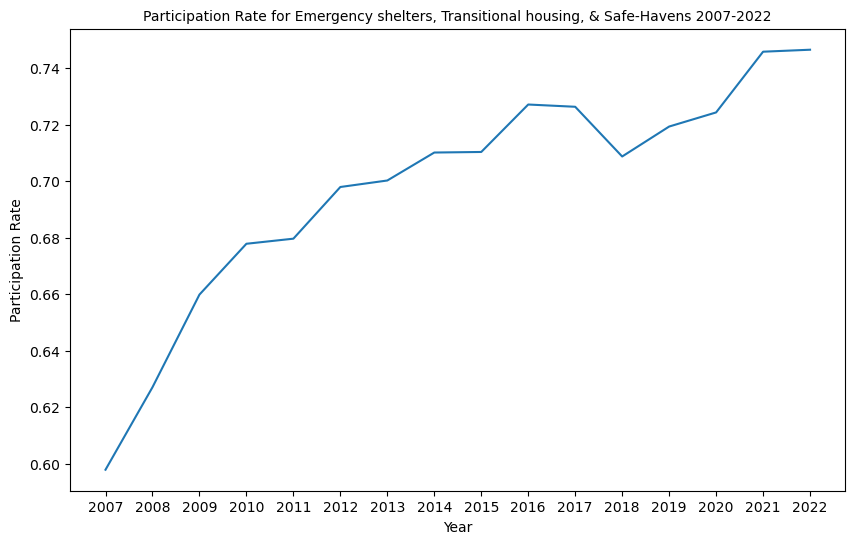

In [38]:
all_perp_rates=all_perp_rates.sort_values('Year')
plt.figure(figsize=(10, 6))
plt.title('Participation Rate for Emergency shelters, Transitional housing, & Safe-Havens 2007-2022', fontsize = 10)
sns.lineplot(x=all_perp_rates["Year"],y=all_perp_rates["Participation Rate"])

In [39]:
edited2022 = CBS2022[['Total Year-Round Beds (RRH)','Total HMIS Year-Round Beds (RRH)','Total Year-Round Beds (PSH)','Total HMIS Year-Round Beds (PSH)']]
# edited2022['Total Year-Round Beds(RRH+PSH)']=['Total Year-Round Beds (RRH)'+'Total Year-Round Beds (PSH)']
edited2022
editprogram = edited2022.loc[55]
editprogram['Total Year-Round Beds(RRH+PSH)']=editprogram['Total Year-Round Beds (RRH)']+editprogram['Total Year-Round Beds (PSH)']
editprogram['Total HMIS Year-Round Beds(RRH+PSH)']= editprogram['Total HMIS Year-Round Beds (RRH)']+editprogram['Total HMIS Year-Round Beds (PSH)']
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round Beds(RRH+PSH)']/ editprogram['Total Year-Round Beds(RRH+PSH)']
otherprograms2022 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',55:'Participation Rate'})
otherprograms2022['Year']= '2022'
otherprograms2022

,Year,Participation Rate
6,2022,0.808875


In [40]:
edited2021 = CBS2021[['Total Year-Round Beds (RRH)','Total HMIS Year-Round Beds (RRH)','Total Year-Round Beds (PSH)','Total HMIS Year-Round Beds (PSH)']]
# edited2022['Total Year-Round Beds(RRH+PSH)']=['Total Year-Round Beds (RRH)'+'Total Year-Round Beds (PSH)']
edited2021
editprogram = edited2021.loc[55]
editprogram['Total Year-Round Beds(RRH+PSH)']=editprogram['Total Year-Round Beds (RRH)']+editprogram['Total Year-Round Beds (PSH)']
editprogram['Total HMIS Year-Round Beds(RRH+PSH)']= editprogram['Total HMIS Year-Round Beds (RRH)']+editprogram['Total HMIS Year-Round Beds (PSH)']
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round Beds(RRH+PSH)']/ editprogram['Total Year-Round Beds(RRH+PSH)']
otherprograms2021 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',55:'Participation Rate'})
otherprograms2021['Year']= '2021'
otherprograms2021

,Year,Participation Rate
6,2021,0.805007


In [41]:
edited2020 = CBS2020[['Total Year-Round Beds (RRH)','Total HMIS Year-Round Beds (RRH)','Total Year-Round Beds (PSH)','Total HMIS Year-Round Beds (PSH)']]
# edited2022['Total Year-Round Beds(RRH+PSH)']=['Total Year-Round Beds (RRH)'+'Total Year-Round Beds (PSH)']
edited2020
editprogram = edited2020.loc[55]
editprogram['Total Year-Round Beds(RRH+PSH)']=editprogram['Total Year-Round Beds (RRH)']+editprogram['Total Year-Round Beds (PSH)']
editprogram['Total HMIS Year-Round Beds(RRH+PSH)']= editprogram['Total HMIS Year-Round Beds (RRH)']+editprogram['Total HMIS Year-Round Beds (PSH)']
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round Beds(RRH+PSH)']/ editprogram['Total Year-Round Beds(RRH+PSH)']
otherprograms2020 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',55:'Participation Rate'})
otherprograms2020['Year']= '2020'
otherprograms2020

,Year,Participation Rate
6,2020,0.792092


In [42]:
edited2019 = CBS2019[['Total Year-Round Beds (RRH)','Total HMIS Year-Round Beds (RRH)','Total Year-Round Beds (PSH)','Total HMIS Year-Round Beds (PSH)']]
# edited2022['Total Year-Round Beds(RRH+PSH)']=['Total Year-Round Beds (RRH)'+'Total Year-Round Beds (PSH)']
edited2019
editprogram = edited2019.loc[55]
editprogram['Total Year-Round Beds(RRH+PSH)']=editprogram['Total Year-Round Beds (RRH)']+editprogram['Total Year-Round Beds (PSH)']
editprogram['Total HMIS Year-Round Beds(RRH+PSH)']= editprogram['Total HMIS Year-Round Beds (RRH)']+editprogram['Total HMIS Year-Round Beds (PSH)']
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round Beds(RRH+PSH)']/ editprogram['Total Year-Round Beds(RRH+PSH)']
otherprograms2019 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',55:'Participation Rate'})
otherprograms2019['Year']= '2019'
otherprograms2019

,Year,Participation Rate
6,2019,0.799429


In [43]:
edited2018 = CBS2018[['Total Year-Round Beds (RRH)','Total HMIS Year-Round Beds (RRH)','Total Year-Round Beds (PSH)','Total HMIS Year-Round Beds (PSH)']]
# edited2022['Total Year-Round Beds(RRH+PSH)']=['Total Year-Round Beds (RRH)'+'Total Year-Round Beds (PSH)']
edited2018
editprogram = edited2018.loc[55]
editprogram['Total Year-Round Beds(RRH+PSH)']=editprogram['Total Year-Round Beds (RRH)']+editprogram['Total Year-Round Beds (PSH)']
editprogram['Total HMIS Year-Round Beds(RRH+PSH)']= editprogram['Total HMIS Year-Round Beds (RRH)']+editprogram['Total HMIS Year-Round Beds (PSH)']
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round Beds(RRH+PSH)']/ editprogram['Total Year-Round Beds(RRH+PSH)']
otherprograms2018 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',55:'Participation Rate'})
otherprograms2018['Year']= '2018'
otherprograms2018

,Year,Participation Rate
6,2018,0.785779


In [44]:
edited2017 = CBS2017[['Total Year-Round Beds (RRH)','Total HMIS Year-Round Beds (RRH)','Total Year-Round Beds (PSH)','Total HMIS Year-Round Beds (PSH)']]
# edited2022['Total Year-Round Beds(RRH+PSH)']=['Total Year-Round Beds (RRH)'+'Total Year-Round Beds (PSH)']
edited2017
editprogram = edited2017.loc[55]
editprogram['Total Year-Round Beds(RRH+PSH)']=editprogram['Total Year-Round Beds (RRH)']+editprogram['Total Year-Round Beds (PSH)']
editprogram['Total HMIS Year-Round Beds(RRH+PSH)']= editprogram['Total HMIS Year-Round Beds (RRH)']+editprogram['Total HMIS Year-Round Beds (PSH)']
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round Beds(RRH+PSH)']/ editprogram['Total Year-Round Beds(RRH+PSH)']
otherprograms2017 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',55:'Participation Rate'})
otherprograms2017['Year']= '2017'
otherprograms2017

,Year,Participation Rate
6,2017,0.766879


In [45]:
edited2016 = CBS2016[['Total Year-Round Beds (RRH)','Total HMIS Year-Round Beds (RRH)','Total Year-Round Beds (PSH)','Total HMIS Year-Round Beds (PSH)']]
# edited2022['Total Year-Round Beds(RRH+PSH)']=['Total Year-Round Beds (RRH)'+'Total Year-Round Beds (PSH)']
edited2016
editprogram = edited2016.loc[54]
editprogram['Total Year-Round Beds(RRH+PSH)']=editprogram['Total Year-Round Beds (RRH)']+editprogram['Total Year-Round Beds (PSH)']
editprogram['Total HMIS Year-Round Beds(RRH+PSH)']= editprogram['Total HMIS Year-Round Beds (RRH)']+editprogram['Total HMIS Year-Round Beds (PSH)']
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round Beds(RRH+PSH)']/ editprogram['Total Year-Round Beds(RRH+PSH)']
otherprograms2016 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',54:'Participation Rate'})
otherprograms2016['Year']= '2016'
otherprograms2016

,Year,Participation Rate
6,2016,0.752648


In [46]:
edited2015 = CBS2015[['Total Year-Round Beds (RRH)','Total HMIS Year-Round Beds (RRH)','Total Year-Round Beds (PSH)','Total HMIS Year-Round Beds (PSH)']]
# edited2022['Total Year-Round Beds(RRH+PSH)']=['Total Year-Round Beds (RRH)'+'Total Year-Round Beds (PSH)']
edited2015
editprogram = edited2015.loc[54]
editprogram['Total Year-Round Beds(RRH+PSH)']=editprogram['Total Year-Round Beds (RRH)']+editprogram['Total Year-Round Beds (PSH)']
editprogram['Total HMIS Year-Round Beds(RRH+PSH)']= editprogram['Total HMIS Year-Round Beds (RRH)']+editprogram['Total HMIS Year-Round Beds (PSH)']
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round Beds(RRH+PSH)']/ editprogram['Total Year-Round Beds(RRH+PSH)']
otherprograms2015 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',54:'Participation Rate'})
otherprograms2015['Year']= '2015'
otherprograms2015

,Year,Participation Rate
6,2015,0.746761


In [47]:
edited2014 = CBS2014[['Total Year-Round Beds (RRH)','Total HMIS Year-Round Beds (RRH)','Total Year-Round Beds (PSH)','Total HMIS Year-Round Beds (PSH)']]
# edited2022['Total Year-Round Beds(RRH+PSH)']=['Total Year-Round Beds (RRH)'+'Total Year-Round Beds (PSH)']
edited2014
editprogram = edited2014.loc[54]
editprogram['Total Year-Round Beds(RRH+PSH)']=editprogram['Total Year-Round Beds (RRH)']+editprogram['Total Year-Round Beds (PSH)']
editprogram['Total HMIS Year-Round Beds(RRH+PSH)']= editprogram['Total HMIS Year-Round Beds (RRH)']+editprogram['Total HMIS Year-Round Beds (PSH)']
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round Beds(RRH+PSH)']/ editprogram['Total Year-Round Beds(RRH+PSH)']
otherprograms2014 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',54:'Participation Rate'})
otherprograms2014['Year']= '2014'
otherprograms2014

,Year,Participation Rate
6,2014,0.740422


In [48]:
edited2013 = CBS2013[['Total Year-Round RRH Beds','Total HMIS Year-Round RRH Beds','Total Year-Round PSH Beds','Total HMIS Year-Round PSH Beds']]
edited2013
editprogram = edited2013.loc[54]
editprogram['Total Year-Round Beds(RRH+PSH)']=editprogram['Total Year-Round RRH Beds']+editprogram['Total Year-Round PSH Beds']
editprogram['Total HMIS Year-Round Beds(RRH+PSH)']= editprogram['Total HMIS Year-Round RRH Beds']+editprogram['Total HMIS Year-Round PSH Beds']
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round Beds(RRH+PSH)']/ editprogram['Total Year-Round Beds(RRH+PSH)']
otherprograms2013 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',54:'Participation Rate'})
otherprograms2013['Year']= '2013'
otherprograms2013

,Year,Participation Rate
6,2013,0.731792


In [49]:
edited2012 = CBS2012[['Total Year-Round PSH Beds','Total HMIS Year-Round PSH Beds']]
edited2012 = edited2012.apply(lambda x: x.str.replace(',', '', regex=True)).astype(int)
editprogram = edited2012.loc[54]
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round PSH Beds']/ editprogram['Total Year-Round PSH Beds']
otherprograms2012 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',54:'Participation Rate'})
otherprograms2012['Year']= '2012'
otherprograms2012

,Year,Participation Rate
2,2012,0.722439


In [50]:
edited2011 = CBS2011[['Total Year-Round PSH Beds','Total HMIS Year-Round PSH Beds']]
edited2011 = edited2011.apply(lambda x: x.str.replace(',', '', regex=True)).astype(int)
editprogram = edited2011.loc[54]
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round PSH Beds']/ editprogram['Total Year-Round PSH Beds']
otherprograms2011 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',54:'Participation Rate'})
otherprograms2011['Year']= '2011'
otherprograms2011

,Year,Participation Rate
2,2011,0.687675


In [51]:
edited2010 = CBS2010[['Total Year-Round PSH Beds','Total HMIS Year-Round PSH Beds']]
edited2010 = edited2010.apply(lambda x: x.str.replace(',', '', regex=True)).astype(int)
editprogram = edited2010.loc[54]
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round PSH Beds']/ editprogram['Total Year-Round PSH Beds']
otherprograms2010 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',54:'Participation Rate'})
otherprograms2010['Year']= '2010'
otherprograms2010

,Year,Participation Rate
2,2010,0.724128


In [52]:
edited2009 = CBS2009[['Total Year-Round PSH Beds','Total HMIS Year-Round PSH Beds']]
edited2009 = edited2009.apply(lambda x: x.str.replace(',', '', regex=True)).astype(int)
editprogram = edited2009.loc[54]
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round PSH Beds']/ editprogram['Total Year-Round PSH Beds']
otherprograms2009 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',54:'Participation Rate'})
otherprograms2009['Year']= '2009'
otherprograms2009

,Year,Participation Rate
2,2009,0.729261


In [53]:
edited2008 = CBS2008[['Total Year-Round PSH Beds','Total HMIS Year-Round PSH Beds']]
edited2008 = edited2008.apply(lambda x: x.str.replace(',', '', regex=True)).astype(int)
editprogram = edited2008.loc[54]
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round PSH Beds']/ editprogram['Total Year-Round PSH Beds']
otherprograms2008 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',54:'Participation Rate'})
otherprograms2008['Year']= '2008'
otherprograms2008

,Year,Participation Rate
2,2008,0.701682


In [54]:
edited2007 = CBS2007[['Total Year-Round PSH Beds','Total HMIS Year-Round PSH Beds']]
edited2007 = edited2007.apply(lambda x: x.str.replace(',', '', regex=True)).astype(int)
editprogram = edited2007.loc[54]
editprogram['Participation Rate']= editprogram['Total HMIS Year-Round PSH Beds']/ editprogram['Total Year-Round PSH Beds']
otherprograms2007 = pd.DataFrame(editprogram).reset_index().tail(1).rename(columns={'index':'Year',54:'Participation Rate'})
otherprograms2007['Year']= '2007'
otherprograms2007

,Year,Participation Rate
2,2007,0.582635


In [55]:
other_perp_rates = pd.concat([otherprograms2007,otherprograms2008,otherprograms2009,otherprograms2010,otherprograms2011,otherprograms2012,otherprograms2013,otherprograms2014,otherprograms2015,otherprograms2016,otherprograms2017,otherprograms2018,otherprograms2019,otherprograms2020,otherprograms2021,otherprograms2022], axis=0)

In [56]:
other_perp_rates = other_perp_rates.rename(columns={'Participation Rate':'Participation Rate(RRH+PSH)'})
all_perp_rates = all_perp_rates.rename(columns={'Participation Rate':'Participation Rate(ES,TH,SH)'})

In [57]:
comparedprograms= all_perp_rates.merge(other_perp_rates, on='Year', how='inner')

In [58]:
comparedprograms

,Year,"Participation Rate(ES,TH,SH)",Participation Rate(RRH+PSH)
0,2007,0.5979,0.582635
1,2008,0.6271,0.701682
2,2009,0.6599,0.729261
3,2010,0.6779,0.724128
4,2011,0.6797,0.687675
5,2012,0.698,0.722439
6,2013,0.7003,0.731792
7,2014,0.7102,0.740422
8,2015,0.7104,0.746761
9,2016,0.7272,0.752648


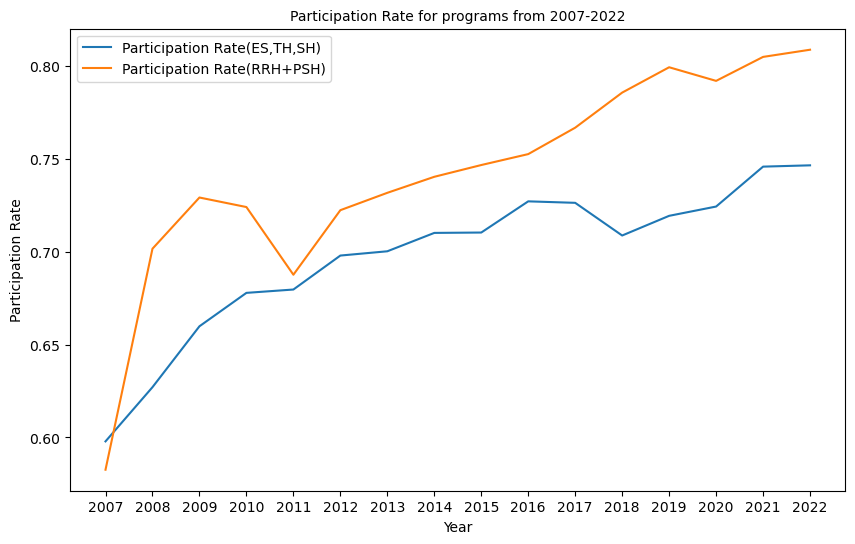

In [59]:
plt.figure(figsize=(10, 6))
plt.title('Participation Rate for programs from 2007-2022', fontsize = 10)
sns.lineplot(data=comparedprograms, x='Year', y='Participation Rate(ES,TH,SH)', label='Participation Rate(ES,TH,SH)')
sns.lineplot(data=comparedprograms, x='Year', y='Participation Rate(RRH+PSH)', label='Participation Rate(RRH+PSH)')

plt.xlabel("Year")
plt.ylabel("Participation Rate")
plt.legend()


In [60]:
CBS2022.head()

,State,Year,buffer nop list,Number of programs,Total houseless pop.,"Total Year-Round Beds (ES, TH, SH)","Total Non-DV Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (ES),...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,AK,2022,AK 2,2.0,2320.0,3088,2547,2439,0.7898,2615,...,279,279,85,0.3047,23,106,173,0,0,0
1,AL,2022,AL 8,8.0,3752.0,2714,2229,1757,0.6474,2034,...,73,73,73,1.0000,6,20,53,0,9,0
2,AR,2022,AR 5,5.0,2459.0,2318,1787,1117,0.4819,1920,...,22,22,22,1.0000,5,12,10,0,0,0
3,AZ,2022,AZ 3,3.0,13553.0,6162,5467,5089,0.8259,4272,...,698,698,419,0.6003,148,482,216,0,23,3
4,CA,2022,CA 44,44.0,171521.0,68607,64427,52234,0.7614,52839,...,18377,18235,14878,0.8096,2102,6203,12167,7,526,487


In [61]:
statesbreakdown2022 = CBS2022[['State','Total Year-Round Beds (ES, TH, SH)','Total HMIS Year-Round Beds (ES, TH, SH)','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].sort_values(by='Total Year-Round Beds (ES, TH, SH)', ascending= False)
statesbreakdown2021 = CBS2021[['State','Total Year-Round Beds (ES, TH, SH)','Total HMIS Year-Round Beds (ES, TH, SH)','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].sort_values(by='Total Year-Round Beds (ES, TH, SH)', ascending= False)
statesbreakdown2020 = CBS2020[['State','Total Year-Round Beds (ES, TH, SH)','Total HMIS Year-Round Beds (ES, TH, SH)','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].sort_values(by='Total Year-Round Beds (ES, TH, SH)', ascending= False)
statesbreakdown2019 = CBS2019[['State','Total Year-Round Beds (ES, TH, SH)','Total HMIS Year-Round Beds (ES, TH, SH)','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].sort_values(by='Total Year-Round Beds (ES, TH, SH)', ascending= False)
statesbreakdown2018 = CBS2018[['State','Total Year-Round Beds (ES, TH, SH)','Total HMIS Year-Round Beds (ES, TH, SH)','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].sort_values(by='Total Year-Round Beds (ES, TH, SH)', ascending= False)
statesbreakdown2017 = CBS2017[['State','Total Year-Round Beds (ES, TH, SH)','Total HMIS Year-Round Beds (ES, TH, SH)','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].sort_values(by='Total Year-Round Beds (ES, TH, SH)', ascending= False)
statesbreakdown2016 = CBS2016[['State','Total Year-Round Beds (ES, TH, SH)','Total HMIS Year-Round Beds (ES, TH, SH)','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].sort_values(by='Total Year-Round Beds (ES, TH, SH)', ascending= False)
statesbreakdown2015 = CBS2015[['State','Total Year-Round Beds (ES, TH, SH)','Total HMIS Year-Round Beds (ES, TH, SH)','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].sort_values(by='Total Year-Round Beds (ES, TH, SH)', ascending= False)
statesbreakdown2014 = CBS2014[['State','Total Year-Round Beds (ES, TH, SH)','Total HMIS Year-Round Beds (ES, TH, SH)','HMIS Participation Rate for Year-Round Beds (ES, TH, SH)']].sort_values(by='Total Year-Round Beds (ES, TH, SH)', ascending= False)


In [62]:
coc2022 = pd.read_excel('..\data\CoCnumbers.xlsx', sheet_name = '2022')
coc2021 = pd.read_excel('..\data\CoCnumbers.xlsx', sheet_name = '2021')
coc2020 = pd.read_excel('..\data\CoCnumbers.xlsx', sheet_name = '2020')
coc2019 = pd.read_excel('..\data\CoCnumbers.xlsx', sheet_name = '2019')
coc2018 = pd.read_excel('..\data\CoCnumbers.xlsx', sheet_name = '2018')
coc2017 = pd.read_excel('..\data\CoCnumbers.xlsx', sheet_name = '2017')
coc2016 = pd.read_excel('..\data\CoCnumbers.xlsx', sheet_name = '2016')
coc2015 = pd.read_excel('..\data\CoCnumbers.xlsx', sheet_name = '2015')
coc2014 = pd.read_excel('..\data\CoCnumbers.xlsx', sheet_name = '2014')

In [63]:
coc2013 = pd.read_excel('..\data\coc2013.xlsx')
coc2012 = pd.read_excel('..\data\coc2012.xlsx')
coc2011 = pd.read_excel('..\data\coc2011.xlsx')
coc2010 = pd.read_excel('..\data\coc2010.xlsx')
coc2009 = pd.read_excel('..\data\coc2009.xlsx')
coc2008 = pd.read_excel('..\data\coc2008.xlsx')
coc2007 = pd.read_excel('..\data\coc2007.xlsx')

In [64]:
nop2022 = pd.DataFrame(coc2022[['State']].value_counts()).rename(columns={0:'number of programs2022'})
nop2021 = pd.DataFrame(coc2021[['State']].value_counts()).rename(columns={0:'number of programs2021'})
nop2020 = pd.DataFrame(coc2020[['State']].value_counts()).rename(columns={0:'number of programs2020'})
nop2019 = pd.DataFrame(coc2019[['State']].value_counts()).rename(columns={0:'number of programs2019'})
nop2018 = pd.DataFrame(coc2018[['State']].value_counts()).rename(columns={0:'number of programs2018'})
nop2017 = pd.DataFrame(coc2017[['State']].value_counts()).rename(columns={0:'number of programs2017'})
nop2016 = pd.DataFrame(coc2016[['State']].value_counts()).rename(columns={0:'number of programs2016'})
nop2015 = pd.DataFrame(coc2015[['State']].value_counts()).rename(columns={0:'number of programs2015'})
nop2014 = pd.DataFrame(coc2014[['State']].value_counts()).rename(columns={0:'number of programs2014'})

In [65]:
mergedstatesandnop2022 = statesbreakdown2022.merge(nop2022, on='State', how='left')
mergedstatesandnop2022['Year'] = 2022

mergedstatesandnop2021 = statesbreakdown2021.merge(nop2021, on='State', how='left')
mergedstatesandnop2021['Year'] = 2021

mergedstatesandnop2020 = statesbreakdown2020.merge(nop2020, on='State', how='left')
mergedstatesandnop2020['Year'] = 2020

mergedstatesandnop2019 = statesbreakdown2019.merge(nop2019, on='State', how='left')
mergedstatesandnop2019['Year'] = 2019

mergedstatesandnop2018 = statesbreakdown2018.merge(nop2018, on='State', how='left')
mergedstatesandnop2018['Year'] = 2018

mergedstatesandnop2017 = statesbreakdown2017.merge(nop2017, on='State', how='left')
mergedstatesandnop2017['Year'] = 2017

mergedstatesandnop2016 = statesbreakdown2016.merge(nop2016, on='State', how='left')
mergedstatesandnop2016['Year'] = 2016

mergedstatesandnop2015 = statesbreakdown2015.merge(nop2015, on='State', how='left')
mergedstatesandnop2015['Year'] = 2015

mergedstatesandnop2014 = statesbreakdown2014.merge(nop2014, on='State', how='left')
mergedstatesandnop2014['Year'] = 2014

In [66]:
mergedstatesandnop2022.head()

,State,"Total Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",number of programs2022,Year
0,Total,418642,312543,0.7466,NaN,2022
1,NY,77443,64913,0.8382,24.0,2022
2,CA,68607,52234,0.7614,44.0,2022
3,TX,19125,12980,0.6787,11.0,2022
4,FL,18393,14462,0.7863,27.0,2022


In [67]:
mergedstatesandnop2014.head()

,State,"Total Year-Round Beds (ES, TH, SH)","Total HMIS Year-Round Beds (ES, TH, SH)","HMIS Participation Rate for Year-Round Beds (ES, TH, SH)",number of programs2014,Year
0,Total,424880,301763,0.7102,NaN,2014
1,NY,78506,65668,0.8365,29.0,2014
2,CA,44035,31075,0.7057,40.0,2014
3,TX,22443,12237,0.5452,12.0,2014
4,FL,22316,16266,0.7289,28.0,2014


In [68]:
coc2013

,CoC Number,State,Program Number,Year,Number of programs,Total Houseless pop.,"Total Year-Round Beds (ES,TH,RRH,SH)","Total Non-DV Year-Round Beds (ES,TH,RRH,SH)","Total HMIS Year-Round Beds (ES,TH,RRH,SH)","HMIS Participation Rate (ES,TH,RRH,SH)",...,Total PSH Beds,Total Year-Round PSH Beds,Total Non-DV Year-Round PSH Beds,Total HMIS Year-Round PSH Beds,PSH HMIS Participation Rate,Total Chronic Homeless PSH Beds,Total PSH Units for Households with Children,Total PSH Beds for Households with Children,Total PSH Beds for Households without Children,Total PSH Beds for Households with only Children
0,AK-500,AK,500.0,2013,2,1946.0,1015,939,769,0.819,...,604,604,604,576,0.954,84,50,178,426,0
1,AK-501,AK,501.0,2013,2,1946.0,880,521,402,0.772,...,188,188,188,188,1.000,36,15,45,143,0
2,AL-500,AL,500.0,2013,8,4689.0,1222,1135,793,0.699,...,1361,1361,1361,1062,0.780,285,194,665,696,0
3,AL-501,AL,501.0,2013,8,4689.0,386,308,300,0.974,...,217,217,217,179,0.825,77,13,36,181,0
4,AL-502,AL,502.0,2013,8,4689.0,258,180,38,0.211,...,68,68,68,0,0.000,10,0,0,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,WV-501,WV,501.0,2013,4,2240.0,291,270,270,1.000,...,518,518,518,518,1.000,87,34,99,419,0
417,WV-503,WV,503.0,2013,4,2240.0,442,425,251,0.591,...,156,156,156,106,0.679,56,15,21,135,0
418,WV-508,WV,508.0,2013,4,2240.0,1131,900,490,0.544,...,514,514,514,164,0.319,121,99,271,243,0
419,WY-500,WY,500.0,2013,1,953.0,905,688,483,0.702,...,198,198,198,20,0.101,6,24,75,77,46


In [69]:
cleaningcoc2013 = coc2013

In [70]:
cleaningcoc2013.columns

Index(['CoC Number', 'State', 'Program Number', 'Year', 'Number of programs',
       'Total Houseless pop.', 'Total Year-Round Beds (ES,TH,RRH,SH)',
       'Total Non-DV Year-Round Beds (ES,TH,RRH,SH)',
       'Total HMIS Year-Round Beds (ES,TH,RRH,SH)',
       'HMIS Participation Rate (ES,TH,RRH,SH)',
       'Total Emergency Shelter (ES) Beds (excluding seasonal+overflow)',
       'Total Transitional Housing (TH) Beds',
       'Total Rapid Rehousing (RRH) Beds', 'Total Safe Haven (SH) Beds',
       'Total Units for Households with Children (ES,TH,RRH)',
       'Total Beds for Households with Children (ES,TH,RRH)',
       'Total Beds for Households without Children (ES,TH,RRH,SH)',
       'Total Beds for Households with only Children (ES,TH,RRH,SH)',
       'Total Year-Round ES Beds', 'Total Non-DV Year-Round ES Beds',
       'Total HMIS Year-Round ES Beds', 'ES HMIS Participation Rate',
       'Total Seasonal ES Beds', 'Total Overflow ES Beds',
       'Total ES Units for Households wi

For 2013, some columns are categorized with RRH, Im removing RRH from the columns and pairing it with PSH

putting initials for the subtraction to not get confused

In [71]:
tyrb_es_th_sh = cleaningcoc2013['Total Year-Round Beds (ES,TH,RRH,SH)']-cleaningcoc2013['Total Year-Round RRH Beds']

In [72]:
cleaningcoc2013['Total Year-Round Beds (ES,TH,SH)']= tyrb_es_th_sh 

In [73]:
cleaningcoc2013[['Total Year-Round Beds (ES,TH,RRH,SH)','Total Year-Round RRH Beds']]

,"Total Year-Round Beds (ES,TH,RRH,SH)",Total Year-Round RRH Beds
0,1015,0
1,880,0
2,1222,0
3,386,5
4,258,0
...,...,...
416,291,3
417,442,9
418,1131,5
419,905,0


In [74]:
cleaningcoc2013['Total Year-Round Beds (ES,TH,RRH,SH)']= cleaningcoc2013['Total Year-Round Beds (ES,TH,SH)']

In [75]:
cleaningcoc2013=cleaningcoc2013.drop(columns='Total Year-Round Beds (ES,TH,SH)').rename(columns={'Total Year-Round Beds (ES,TH,RRH,SH)':'Total Year-Round Beds (ES,TH,SH)'})

In [76]:
tndvyrb_es_th_sh = cleaningcoc2013['Total Non-DV Year-Round Beds (ES,TH,RRH,SH)']-cleaningcoc2013['Total Non-DV Year-Round RRH Beds']

In [77]:
cleaningcoc2013['Total Non-DV Year-Round Beds (ES,TH,RRH,SH)']= tndvyrb_es_th_sh

In [78]:
cleaningcoc2013 = cleaningcoc2013.rename(columns={'Total Non-DV Year-Round Beds (ES,TH,RRH,SH)':'Total Non-DV Year-Round Beds (ES,TH,SH)'})

In [79]:
thyrb_es_th_sh = cleaningcoc2013['Total HMIS Year-Round Beds (ES,TH,RRH,SH)']-cleaningcoc2013['Total HMIS Year-Round RRH Beds']

In [80]:
cleaningcoc2013['Total HMIS Year-Round Beds (ES,TH,RRH,SH)']=thyrb_es_th_sh

In [81]:
cleaningcoc2013 = cleaningcoc2013.rename(columns={'Total HMIS Year-Round Beds (ES,TH,RRH,SH)':'Total HMIS Year-Round Beds (ES,TH,SH)'})

In [82]:
cleaningcoc2013['HMIS Participation Rate (ES,TH,RRH,SH)'] = cleaningcoc2013['Total HMIS Year-Round Beds (ES,TH,SH)']/cleaningcoc2013['Total Year-Round Beds (ES,TH,SH)']

In [83]:
cleaningcoc2013 = cleaningcoc2013.rename(columns={'HMIS Participation Rate (ES,TH,RRH,SH)':'HMIS Participation Rate (ES,TH,SH)'})

In [84]:
tufhwc = cleaningcoc2013['Total Units for Households with Children (ES,TH,RRH)']-cleaningcoc2013['Total RRH Units for Households with Children']
cleaningcoc2013['Total Units for Households with Children (ES,TH,RRH)']=tufhwc
cleaningcoc2013 = cleaningcoc2013.rename(columns={'Total Units for Households with Children (ES,TH,RRH)':'Total Units for Households with Children (ES,TH)'})

In [85]:
tbfhwc = cleaningcoc2013['Total Beds for Households with Children (ES,TH,RRH)']-cleaningcoc2013['Total RRH Beds for Households with Children']
cleaningcoc2013['Total Beds for Households with Children (ES,TH,RRH)']=tbfhwc
cleaningcoc2013 = cleaningcoc2013.rename(columns={'Total Beds for Households with Children (ES,TH,RRH)':'Total Beds for Households with Children (ES,TH)'})

In [86]:
tbfhwoc = cleaningcoc2013['Total Beds for Households without Children (ES,TH,RRH,SH)']-cleaningcoc2013['Total RRH Beds for Households without Children']
cleaningcoc2013['Total Beds for Households without Children (ES,TH,RRH,SH)']=tbfhwoc
cleaningcoc2013 = cleaningcoc2013.rename(columns={'Total Beds for Households without Children (ES,TH,RRH,SH)':'Total Beds for Households without Children (ES,TH,SH)'})

In [87]:
tbfhwooc = cleaningcoc2013['Total Beds for Households with only Children (ES,TH,RRH,SH)']-cleaningcoc2013['Total RRH Beds for Households with only Children']
cleaningcoc2013['Total Beds for Households with only Children (ES,TH,RRH,SH)']=tbfhwooc
cleaningcoc2013 = cleaningcoc2013.rename(columns={'Total Beds for Households with only Children (ES,TH,RRH,SH)':'Total Beds for Households with only Children (ES,TH,SH)'})

In [88]:
cleaningcoc2013['Total Year-Round Beds (RRH,PSH)'] = cleaningcoc2013['Total Year-Round RRH Beds'] + cleaningcoc2013['Total Year-Round PSH Beds']
cleaningcoc2013['Total Non-DV Year-Round Beds (RRH,PSH)'] = cleaningcoc2013['Total Non-DV Year-Round RRH Beds'] + cleaningcoc2013['Total Non-DV Year-Round PSH Beds']
cleaningcoc2013['Total HMIS Year-Round Beds (RRH,PSH)'] = cleaningcoc2013['Total HMIS Year-Round RRH Beds'] + cleaningcoc2013['Total HMIS Year-Round PSH Beds']
cleaningcoc2013['Total Units for Households with Children (RRH,PSH)'] = cleaningcoc2013['Total RRH Units for Households with Children'] + cleaningcoc2013['Total PSH Units for Households with Children']
cleaningcoc2013['Total Beds for Households with Children (RRH,PSH)'] = cleaningcoc2013['Total RRH Beds for Households with Children'] + cleaningcoc2013['Total PSH Beds for Households with Children']
cleaningcoc2013['Total Beds for Households without Children (RRH,PSH)'] = cleaningcoc2013['Total RRH Beds for Households without Children'] + cleaningcoc2013['Total PSH Beds for Households without Children']
cleaningcoc2013['Total Beds for Households with only Children (RRH,PSH)'] = cleaningcoc2013['Total RRH Beds for Households with only Children'] + cleaningcoc2013['Total PSH Beds for Households with only Children']
cleaningcoc2013['HMIS Participation Rate (RRH,PSH)'] = cleaningcoc2013['Total HMIS Year-Round Beds (RRH,PSH)'] / cleaningcoc2013['Total Year-Round Beds (RRH,PSH)']


In [89]:
coc2013 = cleaningcoc2013

In [90]:
coc2013

,CoC Number,State,Program Number,Year,Number of programs,Total Houseless pop.,"Total Year-Round Beds (ES,TH,SH)","Total Non-DV Year-Round Beds (ES,TH,SH)","Total HMIS Year-Round Beds (ES,TH,SH)","HMIS Participation Rate (ES,TH,SH)",...,Total PSH Beds for Households without Children,Total PSH Beds for Households with only Children,"Total Year-Round Beds (RRH,PSH)","Total Non-DV Year-Round Beds (RRH,PSH)","Total HMIS Year-Round Beds (RRH,PSH)","Total Units for Households with Children (RRH,PSH)","Total Beds for Households with Children (RRH,PSH)","Total Beds for Households without Children (RRH,PSH)","Total Beds for Households with only Children (RRH,PSH)","HMIS Participation Rate (RRH,PSH)"
0,AK-500,AK,500.0,2013,2,1946.0,1015,939,769,0.757635,...,426,0,604,604,576,50,178,426,0,0.953642
1,AK-501,AK,501.0,2013,2,1946.0,880,521,402,0.456818,...,143,0,188,188,188,15,45,143,0,1.000000
2,AL-500,AL,500.0,2013,8,4689.0,1222,1135,793,0.648936,...,696,0,1361,1361,1062,194,665,696,0,0.780309
3,AL-501,AL,501.0,2013,8,4689.0,381,303,295,0.774278,...,181,0,222,222,184,13,36,186,0,0.828829
4,AL-502,AL,502.0,2013,8,4689.0,258,180,38,0.147287,...,68,0,68,68,0,0,0,68,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,WV-501,WV,501.0,2013,4,2240.0,288,267,267,0.927083,...,419,0,521,521,521,34,99,422,0,1.000000
417,WV-503,WV,503.0,2013,4,2240.0,433,416,242,0.558891,...,135,0,165,165,115,15,21,144,0,0.696970
418,WV-508,WV,508.0,2013,4,2240.0,1126,895,489,0.434281,...,243,0,519,519,165,100,274,245,0,0.317919
419,WY-500,WY,500.0,2013,1,953.0,905,688,483,0.533702,...,77,46,198,198,20,24,75,77,46,0.101010


In [91]:
cleaningcoc2022 = coc2022
cleaningcoc2021 = coc2021
cleaningcoc2020 = coc2020
cleaningcoc2019 = coc2019
cleaningcoc2018 = coc2018
cleaningcoc2017 = coc2017
cleaningcoc2016 = coc2016
cleaningcoc2015 = coc2015
cleaningcoc2014 = coc2014
cleaningcoc2012 = coc2012
cleaningcoc2011 = coc2011
cleaningcoc2010 = coc2010
cleaningcoc2009 = coc2009
cleaningcoc2008 = coc2008
cleaningcoc2007 = coc2007

In [92]:
cleaningcoc2022['Total Year-Round Beds (RRH,PSH)'] = cleaningcoc2022['Total Year-Round Beds (RRH)'] + cleaningcoc2022['Total Year-Round Beds (PSH)']
cleaningcoc2022['Total Non-DV Year-Round Beds (RRH,PSH)'] = cleaningcoc2022['Total Non-DV Year-Round Beds (RRH)'] + cleaningcoc2022['Total Non-DV Year-Round Beds (PSH)']
cleaningcoc2022['Total HMIS Year-Round Beds (RRH,PSH)'] = cleaningcoc2022['Total HMIS Year-Round Beds (RRH)'] + cleaningcoc2022['Total HMIS Year-Round Beds (PSH)']
cleaningcoc2022['Total Units for Households with Children (RRH,PSH)'] = cleaningcoc2022['Total Units for Households with Children (RRH)'] + cleaningcoc2022['Total Units for Households with Children (PSH)']
cleaningcoc2022['Total Beds for Households with Children (RRH,PSH)'] = cleaningcoc2022['Total Beds for Households with Children (RRH)'] + cleaningcoc2022['Total Beds for Households with Children (PSH)']
cleaningcoc2022['Total Beds for Households without Children (RRH,PSH)'] = cleaningcoc2022['Total Beds for Households without Children (RRH)'] + cleaningcoc2022['Total Beds for Households without Children (PSH)']
cleaningcoc2022['Total Beds for Households with only Children (RRH,PSH)'] = cleaningcoc2022['Total Beds for Households with only Children (RRH)'] + cleaningcoc2022['Total Beds for Households with only Children (PSH)']
cleaningcoc2022['HMIS Participation Rate (RRH,PSH)'] = cleaningcoc2022['Total HMIS Year-Round Beds (RRH,PSH)'] / cleaningcoc2022['Total Year-Round Beds (RRH,PSH)']
coc2022 = cleaningcoc2022

In [93]:
cleaningcoc2021['Total Year-Round Beds (RRH,PSH)'] = cleaningcoc2021['Total Year-Round Beds (RRH)'] + cleaningcoc2021['Total Year-Round Beds (PSH)']
cleaningcoc2021['Total Non-DV Year-Round Beds (RRH,PSH)'] = cleaningcoc2021['Total Non-DV Year-Round Beds (RRH)'] + cleaningcoc2021['Total Non-DV Year-Round Beds (PSH)']
cleaningcoc2021['Total HMIS Year-Round Beds (RRH,PSH)'] = cleaningcoc2021['Total HMIS Year-Round Beds (RRH)'] + cleaningcoc2021['Total HMIS Year-Round Beds (PSH)']
cleaningcoc2021['Total Units for Households with Children (RRH,PSH)'] = cleaningcoc2021['Total Units for Households with Children (RRH)'] + cleaningcoc2021['Total Units for Households with Children (PSH)']
cleaningcoc2021['Total Beds for Households with Children (RRH,PSH)'] = cleaningcoc2021['Total Beds for Households with Children (RRH)'] + cleaningcoc2021['Total Beds for Households with Children (PSH)']
cleaningcoc2021['Total Beds for Households without Children (RRH,PSH)'] = cleaningcoc2021['Total Beds for Households without Children (RRH)'] + cleaningcoc2021['Total Beds for Households without Children (PSH)']
cleaningcoc2021['Total Beds for Households with only Children (RRH,PSH)'] = cleaningcoc2021['Total Beds for Households with only Children (RRH)'] + cleaningcoc2021['Total Beds for Households with only Children (PSH)']
cleaningcoc2021['HMIS Participation Rate (RRH,PSH)'] = cleaningcoc2021['Total HMIS Year-Round Beds (RRH,PSH)'] / cleaningcoc2021['Total Year-Round Beds (RRH,PSH)']
coc2021 = cleaningcoc2021

In [94]:
cleaningcoc2020['Total Year-Round Beds (RRH,PSH)'] = cleaningcoc2020['Total Year-Round Beds (RRH)'] + cleaningcoc2020['Total Year-Round Beds (PSH)']
cleaningcoc2020['Total Non-DV Year-Round Beds (RRH,PSH)'] = cleaningcoc2020['Total Non-DV Year-Round Beds (RRH)'] + cleaningcoc2020['Total Non-DV Year-Round Beds (PSH)']
cleaningcoc2020['Total HMIS Year-Round Beds (RRH,PSH)'] = cleaningcoc2020['Total HMIS Year-Round Beds (RRH)'] + cleaningcoc2020['Total HMIS Year-Round Beds (PSH)']
cleaningcoc2020['Total Units for Households with Children (RRH,PSH)'] = cleaningcoc2020['Total Units for Households with Children (RRH)'] + cleaningcoc2020['Total Units for Households with Children (PSH)']
cleaningcoc2020['Total Beds for Households with Children (RRH,PSH)'] = cleaningcoc2020['Total Beds for Households with Children (RRH)'] + cleaningcoc2020['Total Beds for Households with Children (PSH)']
cleaningcoc2020['Total Beds for Households without Children (RRH,PSH)'] = cleaningcoc2020['Total Beds for Households without Children (RRH)'] + cleaningcoc2020['Total Beds for Households without Children (PSH)']
cleaningcoc2020['Total Beds for Households with only Children (RRH,PSH)'] = cleaningcoc2020['Total Beds for Households with only Children (RRH)'] + cleaningcoc2020['Total Beds for Households with only Children (PSH)']
cleaningcoc2020['HMIS Participation Rate (RRH,PSH)'] = cleaningcoc2020['Total HMIS Year-Round Beds (RRH,PSH)'] / cleaningcoc2020['Total Year-Round Beds (RRH,PSH)']
coc2020 = cleaningcoc2020

In [95]:
cleaningcoc2019['Total Year-Round Beds (RRH,PSH)'] = cleaningcoc2019['Total Year-Round Beds (RRH)'] + cleaningcoc2019['Total Year-Round Beds (PSH)']
cleaningcoc2019['Total Non-DV Year-Round Beds (RRH,PSH)'] = cleaningcoc2019['Total Non-DV Year-Round Beds (RRH)'] + cleaningcoc2019['Total Non-DV Year-Round Beds (PSH)']
cleaningcoc2019['Total HMIS Year-Round Beds (RRH,PSH)'] = cleaningcoc2019['Total HMIS Year-Round Beds (RRH)'] + cleaningcoc2019['Total HMIS Year-Round Beds (PSH)']
cleaningcoc2019['Total Units for Households with Children (RRH,PSH)'] = cleaningcoc2019['Total Units for Households with Children (RRH)'] + cleaningcoc2019['Total Units for Households with Children (PSH)']
cleaningcoc2019['Total Beds for Households with Children (RRH,PSH)'] = cleaningcoc2019['Total Beds for Households with Children (RRH)'] + cleaningcoc2019['Total Beds for Households with Children (PSH)']
cleaningcoc2019['Total Beds for Households without Children (RRH,PSH)'] = cleaningcoc2019['Total Beds for Households without Children (RRH)'] + cleaningcoc2019['Total Beds for Households without Children (PSH)']
cleaningcoc2019['Total Beds for Households with only Children (RRH,PSH)'] = cleaningcoc2019['Total Beds for Households with only Children (RRH)'] + cleaningcoc2019['Total Beds for Households with only Children (PSH)']
cleaningcoc2019['HMIS Participation Rate (RRH,PSH)'] = cleaningcoc2019['Total HMIS Year-Round Beds (RRH,PSH)'] / cleaningcoc2019['Total Year-Round Beds (RRH,PSH)']
coc2019 = cleaningcoc2019

In [96]:
cleaningcoc2018['Total Year-Round Beds (RRH,PSH)'] = cleaningcoc2018['Total Year-Round Beds (RRH)'] + cleaningcoc2018['Total Year-Round Beds (PSH)']
cleaningcoc2018['Total Non-DV Year-Round Beds (RRH,PSH)'] = cleaningcoc2018['Total Non-DV Year-Round Beds (RRH)'] + cleaningcoc2018['Total Non-DV Year-Round Beds (PSH)']
cleaningcoc2018['Total HMIS Year-Round Beds (RRH,PSH)'] = cleaningcoc2018['Total HMIS Year-Round Beds (RRH)'] + cleaningcoc2018['Total HMIS Year-Round Beds (PSH)']
cleaningcoc2018['Total Units for Households with Children (RRH,PSH)'] = cleaningcoc2018['Total Units for Households with Children (RRH)'] + cleaningcoc2018['Total Units for Households with Children (PSH)']
cleaningcoc2018['Total Beds for Households with Children (RRH,PSH)'] = cleaningcoc2018['Total Beds for Households with Children (RRH)'] + cleaningcoc2018['Total Beds for Households with Children (PSH)']
cleaningcoc2018['Total Beds for Households without Children (RRH,PSH)'] = cleaningcoc2018['Total Beds for Households without Children (RRH)'] + cleaningcoc2018['Total Beds for Households without Children (PSH)']
cleaningcoc2018['Total Beds for Households with only Children (RRH,PSH)'] = cleaningcoc2018['Total Beds for Households with only Children (RRH)'] + cleaningcoc2018['Total Beds for Households with only Children (PSH)']
cleaningcoc2018['HMIS Participation Rate (RRH,PSH)'] = cleaningcoc2018['Total HMIS Year-Round Beds (RRH,PSH)'] / cleaningcoc2018['Total Year-Round Beds (RRH,PSH)']
coc2018 = cleaningcoc2018

In [97]:
cleaningcoc2017['Total Year-Round Beds (RRH,PSH)'] = cleaningcoc2017['Total Year-Round Beds (RRH)'] + cleaningcoc2017['Total Year-Round Beds (PSH)']
cleaningcoc2017['Total Non-DV Year-Round Beds (RRH,PSH)'] = cleaningcoc2017['Total Non-DV Year-Round Beds (RRH)'] + cleaningcoc2017['Total Non-DV Year-Round Beds (PSH)']
cleaningcoc2017['Total HMIS Year-Round Beds (RRH,PSH)'] = cleaningcoc2017['Total HMIS Year-Round Beds (RRH)'] + cleaningcoc2017['Total HMIS Year-Round Beds (PSH)']
cleaningcoc2017['Total Units for Households with Children (RRH,PSH)'] = cleaningcoc2017['Total Units for Households with Children (RRH)'] + cleaningcoc2017['Total Units for Households with Children (PSH)']
cleaningcoc2017['Total Beds for Households with Children (RRH,PSH)'] = cleaningcoc2017['Total Beds for Households with Children (RRH)'] + cleaningcoc2017['Total Beds for Households with Children (PSH)']
cleaningcoc2017['Total Beds for Households without Children (RRH,PSH)'] = cleaningcoc2017['Total Beds for Households without Children (RRH)'] + cleaningcoc2017['Total Beds for Households without Children (PSH)']
cleaningcoc2017['Total Beds for Households with only Children (RRH,PSH)'] = cleaningcoc2017['Total Beds for Households with only Children (RRH)'] + cleaningcoc2017['Total Beds for Households with only Children (PSH)']
cleaningcoc2017['HMIS Participation Rate (RRH,PSH)'] = cleaningcoc2017['Total HMIS Year-Round Beds (RRH,PSH)'] / cleaningcoc2017['Total Year-Round Beds (RRH,PSH)']
coc2017 = cleaningcoc2017

In [98]:
cleaningcoc2016['Total Year-Round Beds (RRH,PSH)'] = cleaningcoc2016['Total Year-Round Beds (RRH)'] + cleaningcoc2016['Total Year-Round Beds (PSH)']
cleaningcoc2016['Total Non-DV Year-Round Beds (RRH,PSH)'] = cleaningcoc2016['Total Non-DV Year-Round Beds (RRH)'] + cleaningcoc2016['Total Non-DV Year-Round Beds (PSH)']
cleaningcoc2016['Total HMIS Year-Round Beds (RRH,PSH)'] = cleaningcoc2016['Total HMIS Year-Round Beds (RRH)'] + cleaningcoc2016['Total HMIS Year-Round Beds (PSH)']
cleaningcoc2016['Total Units for Households with Children (RRH,PSH)'] = cleaningcoc2016['Total Units for Households with Children (RRH)'] + cleaningcoc2016['Total Units for Households with Children (PSH)']
cleaningcoc2016['Total Beds for Households with Children (RRH,PSH)'] = cleaningcoc2016['Total Beds for Households with Children (RRH)'] + cleaningcoc2016['Total Beds for Households with Children (PSH)']
cleaningcoc2016['Total Beds for Households without Children (RRH,PSH)'] = cleaningcoc2016['Total Beds for Households without Children (RRH)'] + cleaningcoc2016['Total Beds for Households without Children (PSH)']
cleaningcoc2016['Total Beds for Households with only Children (RRH,PSH)'] = cleaningcoc2016['Total Beds for Households with only Children (RRH)'] + cleaningcoc2016['Total Beds for Households with only Children (PSH)']
cleaningcoc2016['HMIS Participation Rate (RRH,PSH)'] = cleaningcoc2016['Total HMIS Year-Round Beds (RRH,PSH)'] / cleaningcoc2016['Total Year-Round Beds (RRH,PSH)']
coc2016 = cleaningcoc2016

In [99]:
cleaningcoc2015['Total Year-Round Beds (RRH,PSH)'] = cleaningcoc2015['Total Year-Round Beds (RRH)'] + cleaningcoc2015['Total Year-Round Beds (PSH)']
cleaningcoc2015['Total Non-DV Year-Round Beds (RRH,PSH)'] = cleaningcoc2015['Total Non-DV Year-Round Beds (RRH)'] + cleaningcoc2015['Total Non-DV Year-Round Beds (PSH)']
cleaningcoc2015['Total HMIS Year-Round Beds (RRH,PSH)'] = cleaningcoc2015['Total HMIS Year-Round Beds (RRH)'] + cleaningcoc2015['Total HMIS Year-Round Beds (PSH)']
cleaningcoc2015['Total Units for Households with Children (RRH,PSH)'] = cleaningcoc2015['Total Units for Households with Children (RRH)'] + cleaningcoc2015['Total Units for Households with Children (PSH)']
cleaningcoc2015['Total Beds for Households with Children (RRH,PSH)'] = cleaningcoc2015['Total Beds for Households with Children (RRH)'] + cleaningcoc2015['Total Beds for Households with Children (PSH)']
cleaningcoc2015['Total Beds for Households without Children (RRH,PSH)'] = cleaningcoc2015['Total Beds for Households without Children (RRH)'] + cleaningcoc2015['Total Beds for Households without Children (PSH)']
cleaningcoc2015['Total Beds for Households with only Children (RRH,PSH)'] = cleaningcoc2015['Total Beds for Households with only Children (RRH)'] + cleaningcoc2015['Total Beds for Households with only Children (PSH)']
cleaningcoc2015['HMIS Participation Rate (RRH,PSH)'] = cleaningcoc2015['Total HMIS Year-Round Beds (RRH,PSH)'] / cleaningcoc2015['Total Year-Round Beds (RRH,PSH)']
coc2015 = cleaningcoc2015

In [100]:
cleaningcoc2014['Total Year-Round Beds (RRH,PSH)'] = cleaningcoc2014['Total Year-Round Beds (RRH)'] + cleaningcoc2014['Total Year-Round Beds (PSH)']
cleaningcoc2014['Total Non-DV Year-Round Beds (RRH,PSH)'] = cleaningcoc2014['Total Non-DV Year-Round Beds (RRH)'] + cleaningcoc2014['Total Non-DV Year-Round Beds (PSH)']
cleaningcoc2014['Total HMIS Year-Round Beds (RRH,PSH)'] = cleaningcoc2014['Total HMIS Year-Round Beds (RRH)'] + cleaningcoc2014['Total HMIS Year-Round Beds (PSH)']
cleaningcoc2014['Total Units for Households with Children (RRH,PSH)'] = cleaningcoc2014['Total Units for Households with Children (RRH)'] + cleaningcoc2014['Total Units for Households with Children (PSH)']
cleaningcoc2014['Total Beds for Households with Children (RRH,PSH)'] = cleaningcoc2014['Total Beds for Households with Children (RRH)'] + cleaningcoc2014['Total Beds for Households with Children (PSH)']
cleaningcoc2014['Total Beds for Households without Children (RRH,PSH)'] = cleaningcoc2014['Total Beds for Households without Children (RRH)'] + cleaningcoc2014['Total Beds for Households without Children (PSH)']
cleaningcoc2014['Total Beds for Households with only Children (RRH,PSH)'] = cleaningcoc2014['Total Beds for Households with only Children (RRH)'] + cleaningcoc2014['Total Beds for Households with only Children (PSH)']
cleaningcoc2014['HMIS Participation Rate (RRH,PSH)'] = cleaningcoc2014['Total HMIS Year-Round Beds (RRH,PSH)'] / cleaningcoc2014['Total Year-Round Beds (RRH,PSH)']
coc2014 = cleaningcoc2014

In [101]:
coc2022.groupby('State')['Number of programs'].count()
# coc2022[['State','Total Houseless pop.']].drop_duplicates()

State
AK     2
AL     8
AR     5
AZ     3
CA    44
CO     4
CT     2
DC     1
DE     1
FL    27
GA     9
GU     1
HI     2
IA     3
ID     2
IL    19
IN     2
KS     4
KY     3
LA     7
MA    12
MD    11
ME     1
MI    20
MN    10
MO     8
MP     1
MS     3
MT     1
NC    12
ND     1
NE     3
NH     3
NJ    16
NM     2
NV     3
NY    24
OH     9
OK     8
OR     8
PA    16
PR     2
RI     1
SC     4
SD     1
TN    10
TX    11
UT     3
VA    16
VI     1
VT     2
WA     6
WI     4
WV     4
WY     1
Name: Number of programs, dtype: int64